In [1]:
import os
import sys 
sys.path = ["/Users/hideto/dropbox/HIDETO_MORI.LAB/Experiments/Project/Patchplot/patchworklib"] + sys.path
import time
import pandas as pd
import patchworklib as pw
import numpy as np
from plotnine import *
from plotnine.data import *
t0 = time.time()
quick = True

<Figure size 72x72 with 0 Axes>

CPU times: user 1.32 s, sys: 14.5 ms, total: 1.33 s
Wall time: 1.34 s


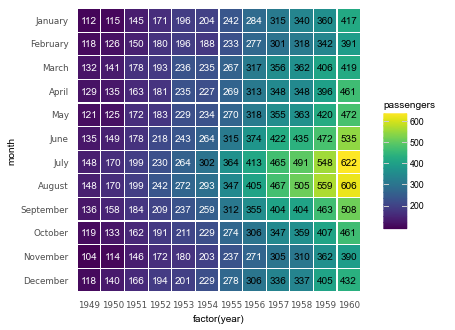

In [2]:
%%time
if "flights.csv" in os.listdir():
    pass
else:
    os.system("wget https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv")
flights = pd.read_csv('flights.csv')
months = flights['month'].unique()  # Months ordered January, ..., December
flights['month'] = pd.Categorical(flights['month'], categories=months)
flights.head()
text_color = np.array(['black']*len(flights))
text_color[flights['passengers']<300] = 'white'
g = (ggplot(flights, aes('factor(year)', 'month', fill='passengers'))
 + geom_tile(aes(width=.95, height=.95))
 + geom_text(aes(label='passengers'), size=10, color=text_color)
 + scale_y_discrete(limits=months[::-1])          
 + theme(                                         
     axis_ticks=element_blank(),
     panel_background=element_rect(fill='white'))
)
g1 = pw.load_ggplot(g, figsize=(4,4))
g1.savefig(quick=quick)

CPU times: user 864 ms, sys: 330 ms, total: 1.19 s
Wall time: 531 ms


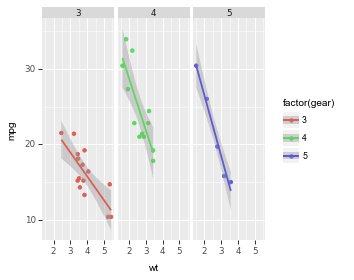

In [3]:
%%time
g = (ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap('~gear'))
g2 = pw.load_ggplot(g, figsize=(4,4))
g2.savefig(quick=quick)

CPU times: user 231 ms, sys: 2.33 ms, total: 234 ms
Wall time: 233 ms


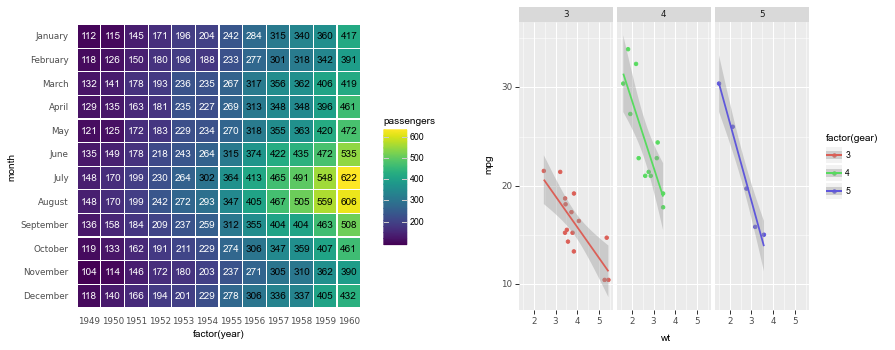

In [4]:
%%time
g12 = (g1|g2)
g12.savefig(quick=quick)

CPU times: user 244 ms, sys: 2.65 ms, total: 247 ms
Wall time: 246 ms


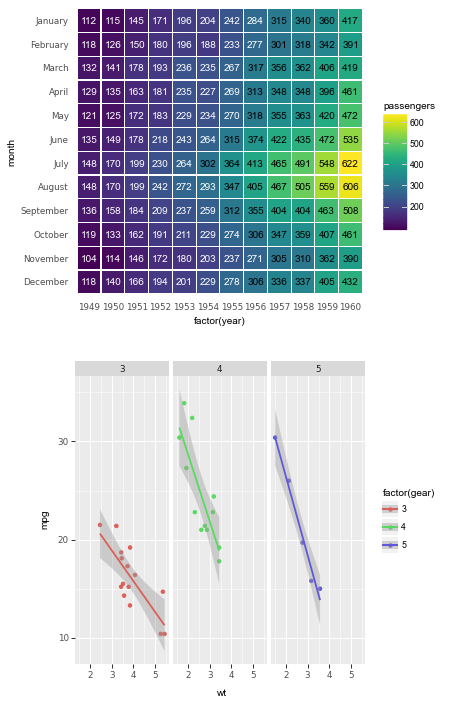

In [5]:
%%time
g12_v = (g1/g2)
g12_v.savefig(quick=quick)

CPU times: user 809 ms, sys: 5.55 ms, total: 815 ms
Wall time: 814 ms


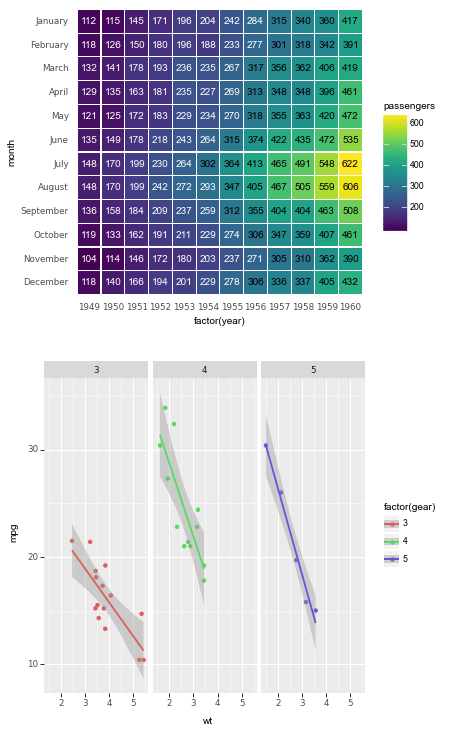

In [6]:
%%time
g12_v = (g1.outline/g2.outline)
g12_v.savefig(quick=quick)

CPU times: user 4.34 s, sys: 301 ms, total: 4.65 s
Wall time: 4.14 s


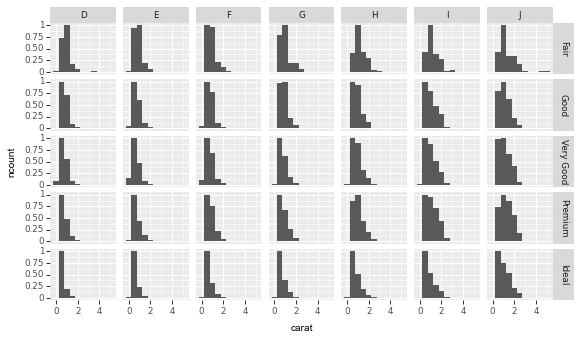

In [7]:
%%time
g = (ggplot(diamonds, aes(x='carat', y=after_stat('ncount'))) 
 + geom_histogram(binwidth=0.5)
 + facet_grid('cut ~ color'))
g3 = pw.load_ggplot(g, figsize=(9,5))
g3.savefig(quick=quick)

CPU times: user 629 ms, sys: 7.28 ms, total: 636 ms
Wall time: 636 ms


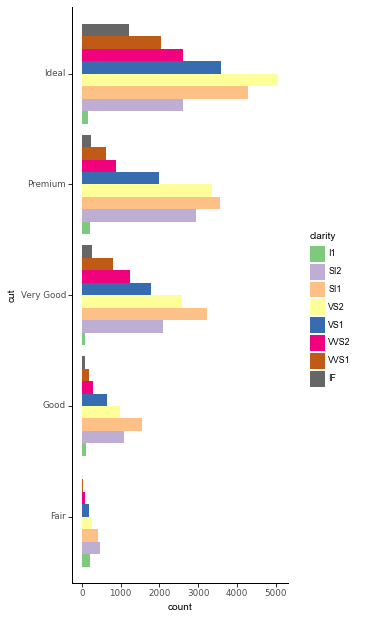

In [8]:
%%time
g = (ggplot(data=diamonds) 
 + geom_bar(mapping=aes(x="cut", fill="clarity"), position="dodge")
 + scale_fill_brewer(palette="Accent", type='qual', direction=1)
 + theme_classic()
 + coord_flip())
g4 = pw.load_ggplot(g, figsize=(3,8))
g4.savefig(quick=quick)

CPU times: user 285 ms, sys: 2.69 ms, total: 288 ms
Wall time: 287 ms


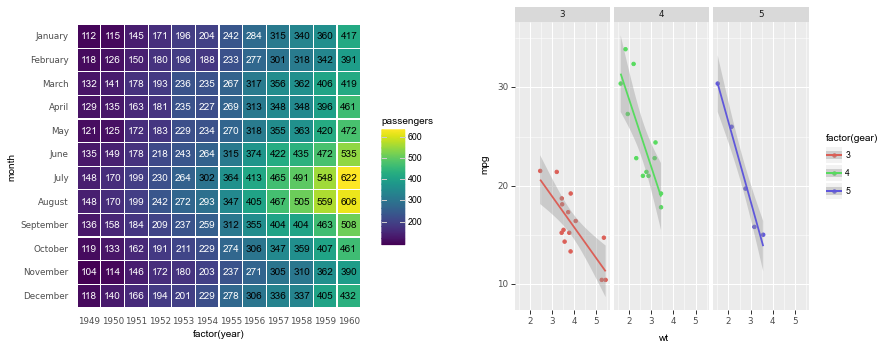

In [9]:
%%time
g12 = (g1|g2)
g12.savefig(quick=quick)

CPU times: user 1.77 s, sys: 10.2 ms, total: 1.78 s
Wall time: 1.78 s


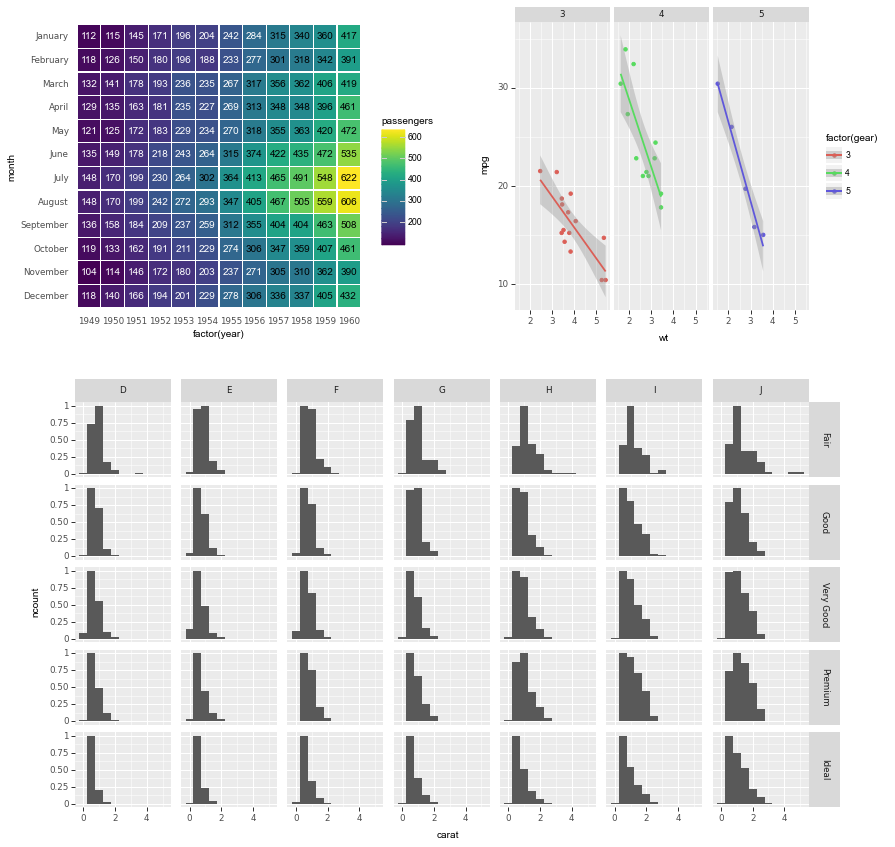

In [10]:
%%time
g123 = (g1|g2)/g3
g123.savefig(quick=quick)

CPU times: user 3.31 s, sys: 18.1 ms, total: 3.33 s
Wall time: 3.33 s


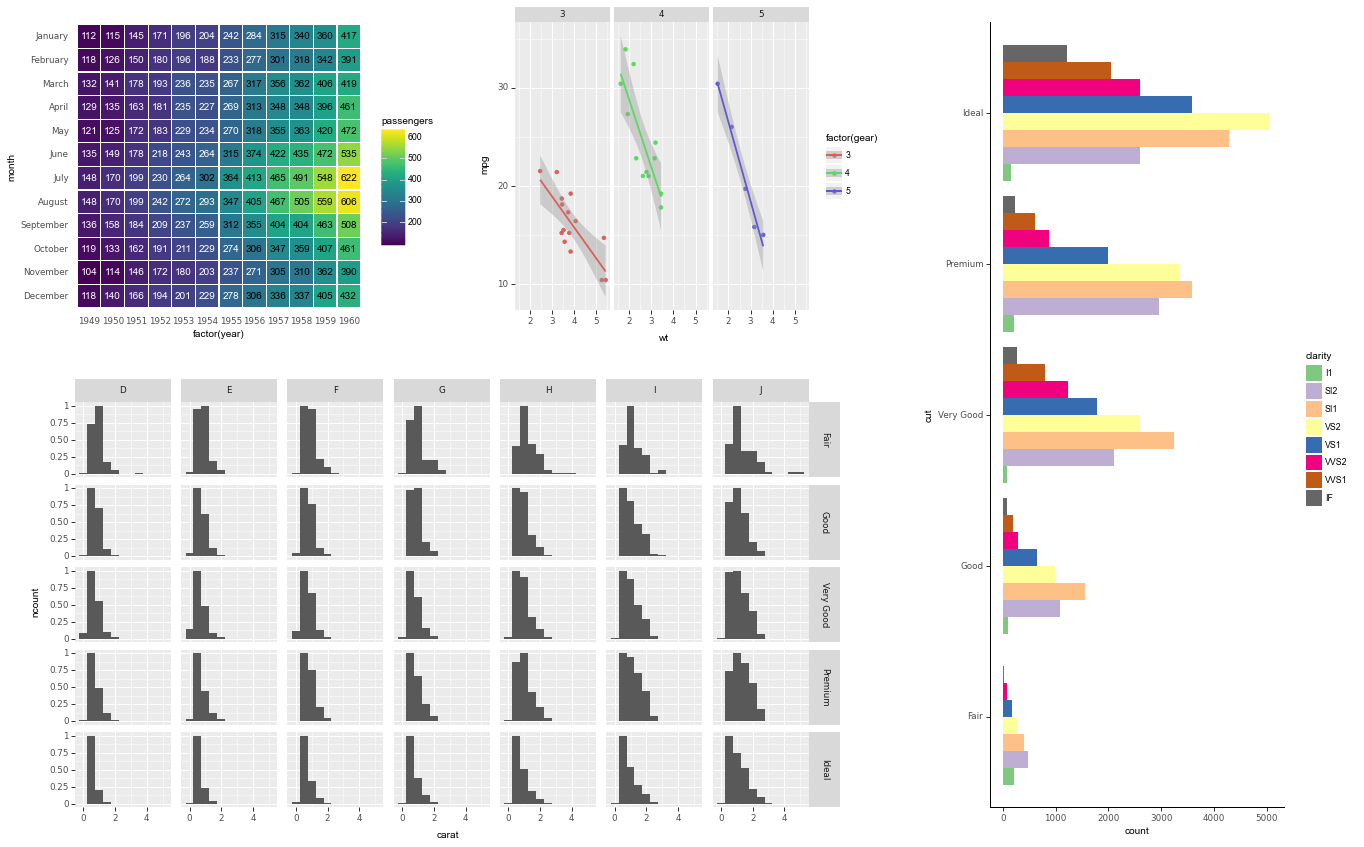

In [11]:
%%time
g1234 = ((g1|g2)/g3)|g4
g1234.savefig(quick=quick)